## Introduction
Notebook où je vais essayer de faire les choses plus propres. Première chose à faire : la stratégie puis la gestion des données puis enfin l'implémentation.


# Stratégie #
On va s'aider fortement du cours de Kaggle sur les time series. Comme l'analyse de périodicité n'a rien donné (a part sur les semaines mais ça on peut le OneHotEncoding), on va essayer de faire en deux temps : 

- regression tree et XGB brutal
- Essai en mettant un lag de 12 jours

Ce sont les premières idées qui me viennent à l'esprit, on verra pour la suite

# Traitement des données #
Si les données sont nombreuses, il n'y a que peu de catégories réelles. La première étape sera de stacker les données en fonction des stations, la deuxième de OOH les jours de la semaine pour tester un premier train. Cela semble raisonnable dans un premier temps

In [1]:
#Bibliothèques
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xgboost import XGBRegressor
from timeseries_utils import *

X_intact = pd.read_csv('x_train.csv')
y_intact = pd.read_csv('y_train.csv')


On va commencer par stacker à l'aide de pandas les stations dans X et y. Pour cela il va falloir séparer les stations de y, ce que l'on va faire dans un premier temps. Ce qui peut être judicieux aussi, c'est de faire un ordinal encoder sur les jours de la semaine pour ne plus qu'à avoir à faire tourner le modèle

In [2]:
#Separation du y
y_sep = y_intact.copy()
y_sep[['date', 'station']] = y_sep['index'].str.split('_', expand=True)


In [3]:
from statsmodels.tsa.deterministic import DeterministicProcess


#Stack des stations
X_prepross= X_intact.copy()
y_prepross = y_sep.copy()
# X_stacked = X_stacked.set_index()
# X_stacked["day"] = X_stacked.index.dayofweek  # the x-axis (freq)
# X_stacked["week"] = X_stacked.index.week 
# dp=DeterministicProcess(index = X_stacked.index,constant=True,order=1,seasonal=True)
# X_stacked = dp.in_sample()

# a voir après le OH des semaines
X_prepross['aff'] = y_prepross['y']

X_prepross = X_prepross.set_index(['station','date']).sort_index()
X_prepross = (X_prepross.groupby(['date','station'])
              .mean()
              .unstack('station'))



y = X_prepross.loc[:,'aff'] 
# X = make_lags(y,lags=12).dropna()
y = make_multistep_target(y,steps=365).dropna()
y, X = y.align(X_prepross, join='inner', axis=0)

X.head()


Empty DataFrame
Columns: [(job, 003), (job, 033), (job, 034), (job, 09U), (job, 0CM), (job, 0GU), (job, 0JU), (job, 0S9), (job, 0TR), (job, 0WC), (job, 0Y9), (job, 0YY), (job, 0ZP), (job, 11W), (job, 12Q), (job, 182), (job, 18L), (job, 193), (job, 19G), (job, 1AA), (job, 1EB), (job, 1EJ), (job, 1EX), (job, 1I8), (job, 1J7), (job, 1PW), (job, 1TE), (job, 1TQ), (job, 1VL), (job, 214), (job, 222), (job, 23N), (job, 25G), (job, 26J), (job, 276), (job, 289), (job, 294), (job, 2AC), (job, 2EW), (job, 2P1), (job, 2PZ), (job, 2SG), (job, 2T1), (job, 2UV), (job, 2YA), (job, 30I), (job, 30R), (job, 34L), (job, 357), (job, 3KU), (job, 3NQ), (job, 3NS), (job, 3T2), (job, 3W6), (job, 3XF), (job, 3Y4), (job, 43B), (job, 45E), (job, 47F), (job, 488), (job, 48S), (job, 495), (job, 4AH), (job, 4CZ), (job, 4EG), (job, 4IM), (job, 4MO), (job, 4PO), (job, 4RW), (job, 4SH), (job, 4UY), (job, 4V8), (job, 4WI), (job, 4YU), (job, 52H), (job, 56P), (job, 56W), (job, 59A), (job, 5GK), (job, 5KB), (job, 5KJ), (job, 5MR), (job, 5PK), (job, 5S5), (job, 5SM), (job, 5U5), (job, 5WG), (job, 5ZC), (job, 651), (job, 6A9), (job, 6DU), (job, 6E0), (job, 6FB), (job, 6HE), (job, 6TL), (job, 6UW), (job, 6VM), (job, 6WR), (job, 700), (job, 72S), ...]
Index: []

[0 rows x 1756 columns]

On va maintenant encoder le nom des stations

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

X = (X
    .stack('station')  # wide to long
    .reset_index('station')  # convert index to column
    .assign(station=lambda x: le.fit_transform(x.station))  # label encode
)

y = pd.DataFrame(y.stack('station'))  # wide to long



In [5]:
display(y)

,,y_step_1,y_step_2,y_step_3,y_step_4,y_step_5,y_step_6,y_step_7,y_step_8,y_step_9,y_step_10,...,y_step_356,y_step_357,y_step_358,y_step_359,y_step_360,y_step_361,y_step_362,y_step_363,y_step_364,y_step_365
date,station,,,,,,,,,,,,,,,,,,,,,


In [6]:
from sklearn.multioutput import RegressorChain


model = RegressorChain(XGBRegressor())
X = X.drop(['aff'],axis=1)
model.fit(X,y)

ValueError: Found array with 0 sample(s) (shape=(0, 4)) while a minimum of 1 is required by RegressorChain.

In [ ]:
from sklearn.metrics import mean_absolute_error
y_pred = pd.DataFrame(
    model.predict(X),
    index=y.index,
    columns=y.columns,
).clip(0.0)

train_rmse = mean_absolute_error(y, y_pred)
print(train_rmse)


2716.7463361643045


Bon l'erreur est pas trop dégueu non plus, reste à faire prédire le modèle maintenant

In [ ]:
X_test = pd.read_csv('x_test.csv')
X_test.drop(['index'],axis=1)
X_test = X_test.set_index(['station','date']).sort_index()
X_test = (X_test.groupby(['date','station'])
              .mean()
              .unstack('station'))

X_test = (X_test
    .stack('station')  # wide to long
    .reset_index('station')  # convert index to column
    .assign(station=lambda x: le.fit_transform(x.station))  # label encode
)

y_predictions = pd.DataFrame(
    model.predict(X_test),
    index=y.index[:78652],
    columns=y.columns,
).clip(0.0)



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_13108\492122665.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  .mean()


In [ ]:
display(y_predictions)

0
date       station             
2015-01-01 003       764.285828
           033       764.285828
           034      2463.522705
           09U      2463.522705
           0CM        80.652039
...                         ...
2015-07-10 H2L      9354.747070
           H2M      9354.747070
           H5M      7506.278320
           HID      7506.278320
           HN1      7506.278320

[78652 rows x 1 columns]

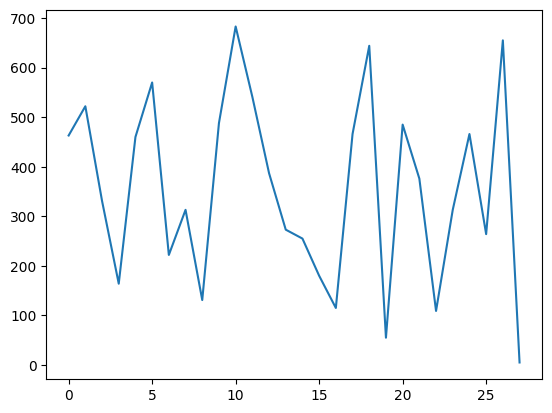

In [ ]:
y.set_index("station",inplace=True)

tab_station= y.loc['1J7']
tab_station_2 = y.loc['M36']
nb_station = []
nb_station_2 = []
for x in tab_station['y']:
    nb_station.append(x)

for x in tab_station_2['y']:
    nb_station_2.append(x)
A = np.arange(0,len(tab_station['y']))
plt.plot(A[0:21],nb_station[60:60+21],nb_station_2[60:60+21])


Il y a bien une "pseudo-périodicité" de 3 jours à peu près mais bon ça saute pas aux yeux